In [57]:
%matplotlib inline 
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import graph_util
from tensorflow.python.platform import gfile
import tensorflow as tf
from keras.datasets import cifar10
import os
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import pylab

pylab.rcParams['figure.figsize'] = (1.0, 1.0)
pb_file_path = os.getcwd() + '/'

batch_size=128
max_steps=500
nb = -1

dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

#想看结果的图片
num_batch = 5
idx = 15

In [58]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
def nextBatch():
    global nb
    nb = nb + 1
    if nb == 390:
        nb = 0
    return trainX[nb*128:(nb+1)*128], np.reshape(trainY[nb*128:(nb+1)*128], (128,))

In [59]:
with tf.Session() as sess:
    with gfile.FastGFile(pb_file_path+'complex_cnn_cifar10_model.pb', 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        sess.graph.as_default()
        tf.import_graph_def(graph_def, name='') # 导入计算图

    # 需要有一个初始化的过程    
    sess.run(tf.global_variables_initializer())
    
    sess.run('weight1:0')
    sess.run('bias1:0')
    sess.run('weight2:0')
    sess.run('bias2:0')
    sess.run('weight3:0')
    sess.run('bias3:0')
    sess.run('weight4:0')
    sess.run('bias4:0')
    sess.run('weight5:0')
    sess.run('bias5:0')
    
    input_x = sess.graph.get_tensor_by_name('image:0')
    input_y = sess.graph.get_tensor_by_name('label:0')
    
    output = sess.graph.get_tensor_by_name('logits:0')
    
    y_out = output.eval( feed_dict={input_x: testX[num_batch*128:(num_batch+1)*128], input_y: np.reshape(testY[num_batch*128:(num_batch+1)*128], (128,))} )
    
    print("Result is:" + str(dict[np.argmax(y_out[idx])]))

Result is:bird


bird


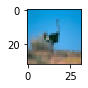

In [60]:
plt.imshow(testX[num_batch*128+idx])
print(dict[testY[num_batch*128+idx][0]])